# Final Project

### General Assembly Data Science Course (datr02apac)

#### Mike Cho


## Part 1: *Proposal*

#### Problem statement relevant to a business problem affecting the team and company.

In August 2016, Bloomberg L.P. announced its acquisition of Barclays Risk Analytics and Index Solutions ("BRAIS") from Barclays. With the $787 Million acquisition, Bloomberg co-branded the  widely-used Barclays Fixed Income benchmark indices into "Bloomberg Barclays Indices". 

After the acquisition, the Bloomberg Barclays Index dataset have been made available to clients who subscribe to the Bloomberg Professional Service. Also, the Fixed Income Division has developed additional valuation and risk data sets using company's market data and valuation model so that Investors can combine these data set for Investment Analysis. 

The goal of this project is to determine whether the Bloomberg valuation models are useful in analyzing and hence predicting investment opportunity for the securities available within the *Bloomberg Barclays Corporate Aggregate Index*.

#### Hypothesis and Assumption

*Hypothesis*: Bloomberg market data (ie. The Bloomberg Default Risk Probability Rate) are important data points for predicting the credit prices of the Bloomberg Barclays Index Bonds. The available data points can be used to generate new investment ideas.

*Assumption*: The data set for this project is based on a specific point in time. The assumption is that the provided data set correctly reflect and measure the market levels. 

*Risks and Limitation* : In order to fully validate the hypothesis and the models, it would be more accurate to perform the analysis on a time series basis. Validation of the testing set on different point-in-time datasets will enhance the validity of this model.

#### Identify at least one relevant internal dataset and confirm that you have (or can get) the right access permissions.

All data set is available for internal employees and clients who subscribed to the Bloomberg Professional Services via the Bloomberg API.


## Part 2: *Brief*

1. Create an Exploratory data anlysis notebook.
2. Perform statistical analysis, along with any visualizations.
3. Determine how to handle sampling or missing values.
4. Clearly identify shortcomings, assumptions, and next steps.

In [132]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight') 

#### Import the downloaded data set via Bloomberg API


In [133]:
df = pd.read_csv("LUACTRUU_bonddata.csv")
df.head()

,ISIN,DESCRIPTION,Par Value,PRICE,MARKET_VALUE,WEIGHT,ISSUE_DT,MATURITY,BICS_LEVEL_1_SECTOR_NAME,AMT_ISSUED,...,EBITDA_TO_INTEREST_EXPN,BB_1YR_DEFAULT_PROB,RSK_BB_IMPLIED_CDS_SPREAD,GUARANTOR,INVESTMENT_GRADE,DUR_MID,CNVX_MID,YAS_YLD_SPREAD,YAS_OAS_SPRD,Z_SPRD_MID
0,US36164QNA21,GE 4.418 11/15/35,11406510,82.323,9427977,0.185846,7/1/2016,11/15/2035,Financials,11406510000,...,-1.326189611,0.010987,185.0,1,1,11.480111,1.633037,294.5602,311.078146,309.6319234
1,US03522AAF75,ABIBB 4.9 02/01/46,9542514,95.079,9243075,0.182201,11/13/2018,2/1/2046,Consumer Staples,9542514000,...,4.967083913,0.000152,90.0,1,1,14.725055,3.033038,207.1131,220.910202,221.4321032
2,US126650CX62,CVS 4.3 03/25/28,9000000,97.864,8890534,0.175251,3/9/2018,3/25/2028,Health Care,9000000000,...,11.29566855,0.000289,107.0,0,1,7.659566,0.671107,166.7436,162.978589,164.5156153
3,US03522AAD28,ABIBB 3.65 02/01/26,8555163,94.695,8214941,0.161934,11/13/2018,2/1/2026,Consumer Staples,8555163000,...,4.967083913,0.000152,90.0,1,1,6.230380,0.436189,164.9950,157.382648,158.6176031
4,US126650CZ11,CVS 5.05 03/25/48,8000000,98.793,7989852,0.157497,3/9/2018,3/25/2048,Health Care,8000000000,...,11.29566855,0.000289,107.0,0,1,15.350137,3.334760,197.3188,211.425291,212.0799208


In [153]:
df.shape

(3618, 27)

#### Check for Missing Values and perform necessary Data Cleansing

In [134]:
# Explore the datafields that are available and respective data types.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5862 entries, 0 to 5861
Data columns (total 26 columns):
ISIN                         5862 non-null object
DESCRIPTION                  5862 non-null object
Par Value                    5862 non-null int64
PRICE                        5862 non-null float64
MARKET_VALUE                 5862 non-null int64
WEIGHT                       5862 non-null float64
ISSUE_DT                     5862 non-null object
MATURITY                     5862 non-null object
BICS_LEVEL_1_SECTOR_NAME     5862 non-null object
AMT_ISSUED                   5862 non-null int64
AMT_OUTSTANDING              5862 non-null float64
CRNCY                        5862 non-null object
CNTRY_OF_RISK                5862 non-null object
DEBT_EBITDA                  4720 non-null object
CUR_EV_COMPONENT             5079 non-null object
EV_TO_T12M_EBITDA            3824 non-null object
EBITDA_TO_INTEREST_EXPN      4666 non-null object
BB_1YR_DEFAULT_PROB          5698 non-null 

In [135]:
# Drop all rows with missing values 

df.dropna(axis=0, inplace = True)

In [136]:
# Some columns are currently in String format instead of Floats. Convert the respective columns

for column in df[['DEBT_EBITDA', 'CUR_EV_COMPONENT','EV_TO_T12M_EBITDA', 'EBITDA_TO_INTEREST_EXPN','Z_SPRD_MID']]:
    # Use map(lambda()) to convert into floats
    df[column] = list(map(lambda x:float(x), df[column]))

In [137]:
# Convert the date columns to datetime object. 

# First check how the ISSUE_DT and MATURITY column dates are displayed
print(df['ISSUE_DT'][1])

11/13/2018


In [138]:
# Since it is in MM/DD/YYYY format, create a new variable to define the date structure
format_str = '%m/%d/%Y'

# Use datetime.datetime.striptime() method to convert into datetime objects
df['ISSUE_DT'] = list(map(lambda x:datetime.strptime(x, format_str), df['ISSUE_DT']))
df['MATURITY'] = list(map(lambda x:datetime.strptime(x, format_str), df['MATURITY']))

In [140]:
# To perform Duration-adjusted analysis, create a new column called "YEARS_TO_MATURITY" and find the number of years remaining from Issue Date to Maturity Date

from dateutil.relativedelta import relativedelta

df['YEARS_TO_MATURITY'] = list(map(lambda x, y: relativedelta(x,y).years,df['MATURITY'],df['ISSUE_DT']))

In [141]:
# We can now check if the data types are all correct. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3692 entries, 1 to 5861
Data columns (total 27 columns):
ISIN                         3692 non-null object
DESCRIPTION                  3692 non-null object
Par Value                    3692 non-null int64
PRICE                        3692 non-null float64
MARKET_VALUE                 3692 non-null int64
WEIGHT                       3692 non-null float64
ISSUE_DT                     3692 non-null datetime64[ns]
MATURITY                     3692 non-null datetime64[ns]
BICS_LEVEL_1_SECTOR_NAME     3692 non-null object
AMT_ISSUED                   3692 non-null int64
AMT_OUTSTANDING              3692 non-null float64
CRNCY                        3692 non-null object
CNTRY_OF_RISK                3692 non-null object
DEBT_EBITDA                  3692 non-null float64
CUR_EV_COMPONENT             3692 non-null float64
EV_TO_T12M_EBITDA            3692 non-null float64
EBITDA_TO_INTEREST_EXPN      3692 non-null float64
BB_1YR_DEFAULT_PROB    

In [142]:
# For our Target and Feature Columns, rename for easy referencing

df.rename(columns={'Z_SPRD_MID':'SPREAD', 'BB_1YR_DEFAULT_PROB':'PROBABILITY'}, inplace=True)

In [143]:
# Get rid of outliers with 1%, and 99% Percentile Cut Off

In [144]:
df = df[df.SPREAD < df.SPREAD.quantile(.99)]

In [145]:
df = df[df.SPREAD > df.SPREAD.quantile(.01)]

#### Statistical and Exploratory Analysis of the DataSet

In [146]:
# Look at the main summary statistics to see if there are any interesting insights

df.describe()

,Par Value,PRICE,MARKET_VALUE,WEIGHT,AMT_ISSUED,AMT_OUTSTANDING,DEBT_EBITDA,CUR_EV_COMPONENT,EV_TO_T12M_EBITDA,EBITDA_TO_INTEREST_EXPN,PROBABILITY,RSK_BB_IMPLIED_CDS_SPREAD,GUARANTOR,INVESTMENT_GRADE,DUR_MID,CNVX_MID,YAS_YLD_SPREAD,YAS_OAS_SPRD,SPREAD,YEARS_TO_MATURITY
count,3.618000e+03,3618.000000,3.618000e+03,3618.000000,3.618000e+03,3.618000e+03,3618.000000,3.618000e+03,3618.000000,3618.000000,3.618000e+03,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000
mean,8.918649e+05,99.065575,8.880030e+05,0.017504,9.415276e+08,8.910659e+08,2.408278,1.577189e+04,18.929594,12.315884,4.474422e-04,87.263958,0.250415,0.959646,7.434657,1.022335,137.839911,135.177261,136.981392,15.138198
std,7.565683e+05,7.892769,7.510122e+05,0.014804,8.657207e+08,7.565430e+08,2.231270,3.332407e+05,117.701108,22.216057,2.604384e-03,48.193799,0.433312,0.196815,4.820519,1.223065,61.326162,68.508928,67.341122,10.396732
min,3.000000e+05,74.217000,2.477090e+05,0.004883,3.000000e+08,3.800000e+04,-13.072816,-1.965568e+07,2.276304,-7.984615,4.761420e-11,16.000000,0.000000,0.000000,0.908044,0.012435,20.572400,-11.301967,9.578724,1.000000
25%,4.860520e+05,95.192000,4.634302e+05,0.009135,5.000000e+08,4.830785e+08,1.173805,3.704000e+03,8.954889,5.159332,2.853510e-06,54.000000,0.000000,1.000000,3.518195,0.140961,91.808175,83.581755,85.604777,9.000000
50%,6.414090e+05,98.011500,6.441570e+05,0.012698,7.000000e+08,6.381350e+08,2.153778,1.040600e+04,12.614176,9.141160,2.085920e-05,76.000000,0.000000,1.000000,6.068904,0.415931,128.190800,128.048888,129.094719,10.000000
75%,1.000000e+06,100.574250,1.004524e+06,0.019801,1.000000e+09,1.000000e+09,3.371942,2.238660e+04,16.262971,14.139082,1.657100e-04,109.000000,1.000000,1.000000,11.774955,1.793623,173.875775,176.704878,177.834767,29.000000
max,9.542514e+06,147.045000,9.243075e+06,0.182201,1.500000e+10,9.542514e+09,15.745969,2.095118e+06,2686.679947,754.382482,4.043850e-02,316.000000,1.000000,1.000000,19.512785,6.578180,359.712000,349.073938,349.318765,99.000000


#### Perform Grouping  Analysis 

In [15]:
df.columns

Index(['ISIN', 'DESCRIPTION', 'Par Value', 'PRICE', 'MARKET_VALUE', 'WEIGHT',
       'ISSUE_DT', 'MATURITY', 'BICS_LEVEL_1_SECTOR_NAME', 'AMT_ISSUED',
       'AMT_OUTSTANDING', 'CRNCY', 'CNTRY_OF_RISK', 'DEBT_EBITDA',
       'CUR_EV_COMPONENT', 'EV_TO_T12M_EBITDA', 'EBITDA_TO_INTEREST_EXPN',
       'PROBABILITY', 'RSK_BB_IMPLIED_CDS_SPREAD', 'GUARANTOR',
       'INVESTMENT_GRADE', 'DUR_MID', 'CNVX_MID', 'YAS_YLD_SPREAD',
       'YAS_OAS_SPRD', 'SPREAD', 'YEARS_TO_MATURITY'],
      dtype='object')

Text(0.5, 1.0, 'Number of Bonds per Sector')

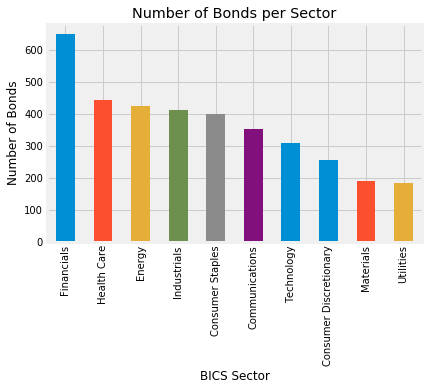

In [16]:
# Count the number of securities per each sector

df['BICS_LEVEL_1_SECTOR_NAME'].value_counts().plot(kind='bar')
plt.xlabel('BICS Sector')
plt.ylabel('Number of Bonds')
plt.title('Number of Bonds per Sector')


Text(0.5, 1.0, 'Average Credit Spread by Sector')

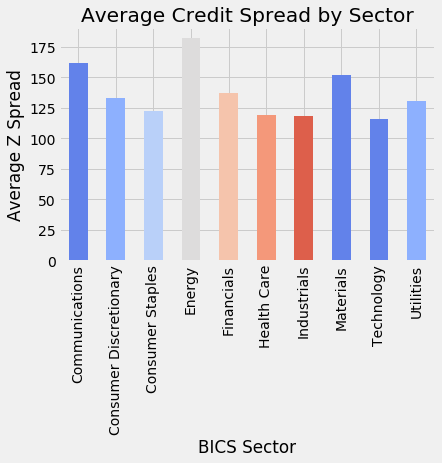

In [161]:
df.groupby('BICS_LEVEL_1_SECTOR_NAME')['SPREAD'].mean().plot(kind='bar')
plt.xlabel('BICS Sector')
plt.ylabel('Average Z Spread')
plt.title('Average Credit Spread by Sector')

Text(0.5, 1.0, 'Portion of Total Market Size by Sector')

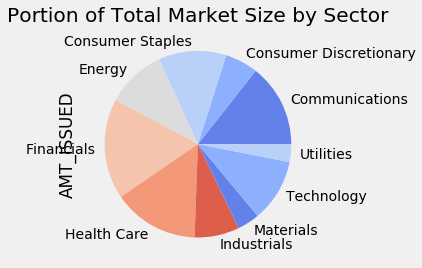

In [162]:
df.groupby('BICS_LEVEL_1_SECTOR_NAME')['AMT_ISSUED'].sum().plot(kind='pie')
plt.title('Portion of Total Market Size by Sector')

#### Graphical Representation of how the Credit Spread is distributed against the Years till Maturity

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


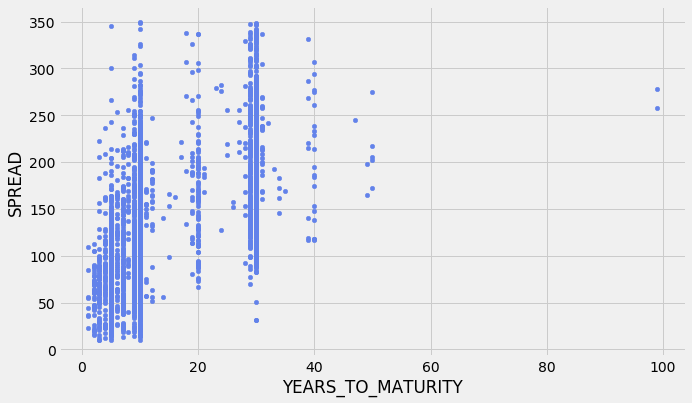

In [151]:
df.plot(kind='scatter', x='YEARS_TO_MATURITY', y='SPREAD', figsize=(10, 6));

#### Check Correlation Levels in order to understand the factors that might be important in determining the target column

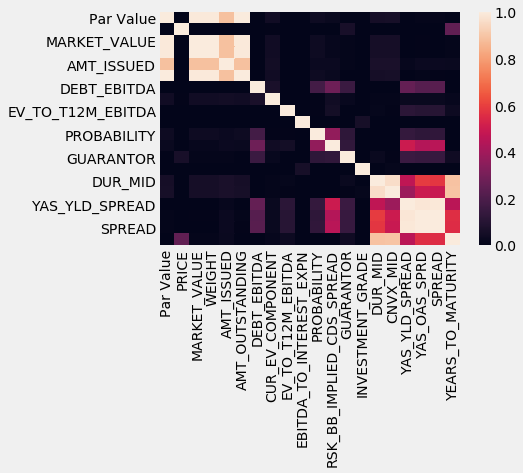

In [152]:
sns.set_palette("coolwarm", 7)
sns.heatmap(df.corr(), vmin=0, vmax=1) 

## Part 3: *Technical Notebook*

Develop a prototype model or process to successfully resolve the business problem you've chosen. Document your work in a technical notebook that can be shared with your peers.


In [22]:
# Create a new target column with the SPREAD data
df['target'] = df['SPREAD'].mean()

In [33]:
from sklearn import metrics

def split_level(data):
    lower_point = df[df.DUR_MID < data]['SPREAD'].mean()
    higher_point = df[df.DUR_MID > data]['SPREAD'].mean()
    
    df['prediction'] = np.where(df.DUR_MID < data, lower_point, higher_point)
    return np.sqrt(metrics.mean_squared_error(df.SPREAD, df.target))

In [34]:
df['DUR_MID'].describe()

count    3618.000000
mean        7.434657
std         4.820519
min         0.908044
25%         3.518195
50%         6.068904
75%        11.774955
max        19.512785
Name: DUR_MID, dtype: float64

In [37]:
# Check all possible BB_1YR_DEFAULT_PROB splits.
prob_range = list(np.arange(df.DUR_MID.min(), df.DUR_MID.max(), 0.1))

In [38]:
RMSE = [split_level(prob) for prob in prob_range]

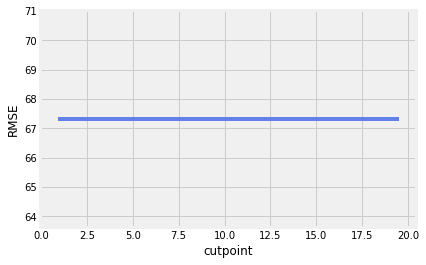

In [40]:
# Plot mileage cutpoint (x-axis) versus RMSE (y-axis).
plt.plot(prob_range, RMSE);
plt.xlabel('cutpoint');
plt.ylabel('RMSE');

#### Building Regression Tree with the selected Features

In [108]:
# Define X and y.
feature_cols = ['DEBT_EBITDA','PROBABILITY','RSK_BB_IMPLIED_CDS_SPREAD','DUR_MID','GUARANTOR','AMT_OUTSTANDING','EV_TO_T12M_EBITDA']
X = df[feature_cols]
y = df.SPREAD

In [83]:
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [84]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

35.3527579446072

In [85]:
# List of values to try:
max_depth_range = list(range(1, 15))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use LOOCV within the max_depth_range.
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

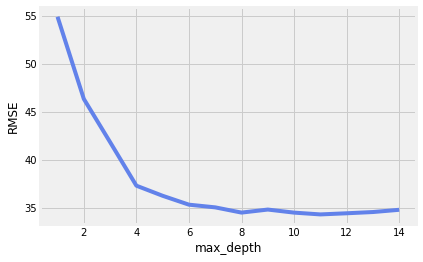

In [86]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE');

In [87]:
# Fit DecisionTree

treereg = DecisionTreeRegressor(max_depth=8, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [97]:
# "Gini importance" of each feature
importance = pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})
importance_sorted = importance.sort_values(by='importance', ascending=False)
importance_sorted

,feature,importance
3,DUR_MID,0.521528
1,PROBABILITY,0.211589
2,RSK_BB_IMPLIED_CDS_SPREAD,0.128479
0,DEBT_EBITDA,0.085554
6,EV_TO_T12M_EBITDA,0.032579
5,AMT_OUTSTANDING,0.011550
4,GUARANTOR,0.008722


### Testing the Model Validity with Randomly Chosen Testing Data

In [154]:
test = df.sample(n=10)

In [109]:
X_test = test[feature_cols]
y_test = test.target
y_pred = treereg.predict(X_test)

y_pred

array([103.99893423, 194.16659413, 227.04476962,  81.09773918,
        69.54397578, 176.7545826 , 127.69431578, 267.0797249 ,
        97.0185886 ,  68.61131288])

In [110]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

67.08607584662892